<a href="https://colab.research.google.com/github/Saisathwika-08/GENAI-PROJECT/blob/main/GenAI_CourseProject_Teamno.(01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Data** **Preprocessing**


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("/content/Rural_Empowerment_AI_Final_with_Visuals_Fixed (1).xlsx")
df.head()



,District,Rural Population (%),Literacy Rate (%),Internet Access in Rural Areas (%),Primary Occupation,Has AI Chatbot Initiative,Healthcare Access Index (0-100),Digital Literacy (%),AI Adoption Potential (Low/Medium/High),Sustainability Index (0-100),...,Education & Skill Generator Access (%),AI-Powered Govt Scheme Explainer,Presence of AI Chatbots,AI Education Chatbot Access (%),Smart Health Monitoring Adoption (%),Agriculture Yield Prediction Usage (%),AI Livelihood Assistant Usage (%),Digital Grievance Redressal AI (%),Chatbot Language Support Count,AI Tool Integration Score (0-100)
0,Bastar,89.23,56.14,21.61,Daily Wage,No,43.51,26.92,Medium,61.96,...,43.84,Yes,Yes,29.35,31.65,18.89,49.40,6.87,9,24.93
1,Bijapur,60.51,73.74,19.82,Daily Wage,Yes,70.83,57.86,Low,73.00,...,12.46,No,No,66.80,5.93,46.56,21.84,7.77,2,78.16
2,Khagaria,88.70,70.22,40.11,Daily Wage,Yes,42.33,59.20,Low,74.11,...,16.36,No,No,52.58,18.88,63.90,21.68,7.28,8,54.00
3,Muzaffarpur,60.63,84.87,31.58,Daily Wage,No,43.10,19.88,High,69.14,...,19.15,No,Yes,43.91,54.77,25.11,41.58,26.35,8,59.33
4,Ranchi,73.39,49.50,18.29,Services,Yes,76.58,53.16,High,35.46,...,46.08,Yes,Yes,15.14,16.66,53.60,47.63,8.91,7,53.06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   District                                    147 non-null    object 
 1   Rural Population (%)                        147 non-null    float64
 2   Literacy Rate (%)                           147 non-null    float64
 3   Internet Access in Rural Areas (%)          147 non-null    float64
 4   Primary Occupation                          147 non-null    object 
 5   Has AI Chatbot Initiative                   147 non-null    object 
 6   Healthcare Access Index (0-100)             147 non-null    float64
 7   Digital Literacy (%)                        147 non-null    float64
 8   AI Adoption Potential (Low/Medium/High)     147 non-null    object 
 9   Sustainability Index (0-100)                147 non-null    float64
 10  Female Literac

In [8]:
df.shape

(147, 32)

In [9]:
target = "AI Tool Integration Score (0-100)"
df = df.dropna(subset=[target])
X = df.drop(columns=["District", target])
y = df[target]
X_encoded = pd.get_dummies(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 **Livelihood Empowerment** **Score**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
livelihood_features = [
    'Literacy Rate (%)',
    'Digital Literacy (%)',
    'Healthcare Access Index (0-100)',
    'Sustainability Index (0-100)',
    'Unemployment Rate (%)',
    'Access to Government Schemes (%)',
    'Self Help Groups (per 1000 people)',
    'Access to Clean Drinking Water (%)',
    'Healthcare and Well-being Coverage (%)'
]
empower_data = df[livelihood_features].copy()
scaler = MinMaxScaler()
empower_scaled = scaler.fit_transform(empower_data)
df["Livelihood Empowerment Score"] = empower_scaled.mean(axis=1) * 100
print(df[["District", "Livelihood Empowerment Score"]].head())
df.to_excel("Rural_Empowerment_With_Custom_Score.xlsx", index=False)



      District  Livelihood Empowerment Score
0       Bastar                     45.008970
1      Bijapur                     58.911579
2     Khagaria                     59.958364
3  Muzaffarpur                     52.197680
4       Ranchi                     44.376963


**Part 2: Linear** **Regression**

Linear Regression Results
MAE: 24.23
MSE: 810.12
RMSE: 28.46


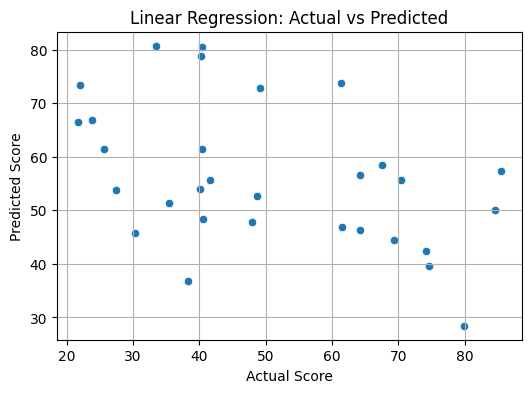

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_lr_pred = lr.predict(X_test_scaled)

# Evaluation metrics
print("Linear Regression Results")
print(f"MAE: {mean_absolute_error(y_test, y_lr_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_lr_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_lr_pred)):.2f}")


# Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_lr_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()



 **Part 3:** **ANN** **(Artificial Neural Network)**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
ANN Results
MAE: 21.02
MSE: 602.64
RMSE: 24.55


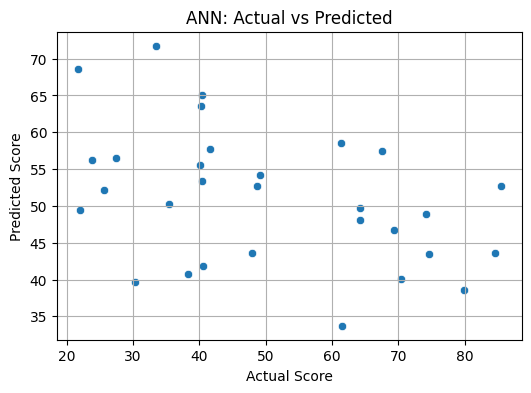

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2,
        callbacks=[EarlyStopping(patience=10)], verbose=0)
y_ann_pred = ann.predict(X_test_scaled).flatten()
print("ANN Results")
print(f"MAE: {mean_absolute_error(y_test, y_ann_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_ann_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_ann_pred)):.2f}")
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_ann_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("ANN: Actual vs Predicted")
plt.grid(True)
plt.show()


**Part** **4**:  **CNN** **(1D Convolutional Neural Network)**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
CNN Results
MAE: 19.31
MSE: 447.92
RMSE: 21.16


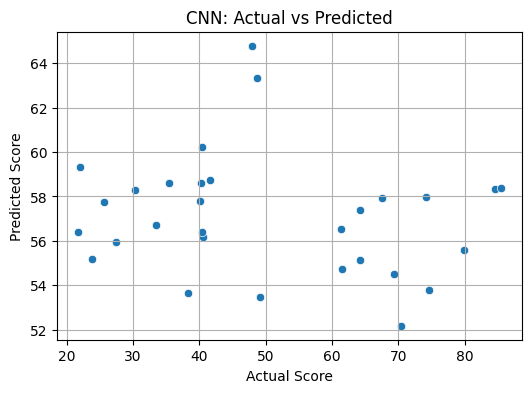

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reshape input for CNN
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# Build CNN model
input_layer = Input(shape=(X_train_cnn.shape[1], 1))
x = Conv1D(64, 3, activation='relu')(input_layer)
x = MaxPooling1D()(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1)(x)

cnn = Model(inputs=input_layer, outputs=output_layer)

# Compile model
cnn.compile(optimizer='adam', loss='mse')

# Train model
cnn.fit(X_train_cnn, y_train, epochs=50, validation_split=0.2, verbose=0)

# Predict
y_cnn_pred = cnn.predict(X_test_cnn).flatten()

# Evaluation
print("CNN Results")
print(f"MAE: {mean_absolute_error(y_test, y_cnn_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_cnn_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_cnn_pred)):.2f}")


# Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_cnn_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("CNN: Actual vs Predicted")
plt.grid(True)
plt.show()


**Part** **5**: **RNN  (LSTM for Tabular Data)**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
RNN (LSTM) Results
MAE: 18.06
MSE: 400.41
RMSE: 20.01
Random Forest R² (after tuning): -0.32730329255423585


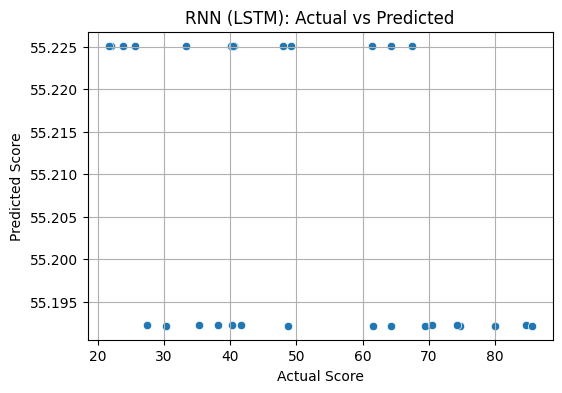

In [16]:
# Part 5: RNN (LSTM for Tabular Data)

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reuse the CNN-style input
X_train_rnn = np.expand_dims(X_train_scaled, axis=2)
X_test_rnn = np.expand_dims(X_test_scaled, axis=2)

# Build RNN model using LSTM
input_rnn = Input(shape=(X_train_rnn.shape[1], 1))
x = LSTM(64)(input_rnn)
x = Dense(32, activation='relu')(x)
output_rnn = Dense(1)(x)

rnn = Model(inputs=input_rnn, outputs=output_rnn)

# Compile model
rnn.compile(optimizer='adam', loss='mse')

# Train model
rnn.fit(X_train_rnn, y_train, epochs=50, validation_split=0.2, verbose=0)

# Predict
y_rnn_pred = rnn.predict(X_test_rnn).flatten()

# Evaluation
print("RNN (LSTM) Results")
print(f"MAE: {mean_absolute_error(y_test, y_rnn_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_rnn_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_rnn_pred)):.2f}")
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculate R² score
print("Random Forest R² (after tuning):", r2_score(y_test, y_pred_rf))


# Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_rnn_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("RNN (LSTM): Actual vs Predicted")
plt.grid(True)
plt.show()


 **Part** **6**: **GAN** **(Synthetic Data Generator)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

# Generator
def build_generator(latent_dim, output_dim):
    model = Sequential([
        Dense(64, input_dim=latent_dim),
        LeakyReLU(0.2),
        Dense(128),
        LeakyReLU(0.2),
        Dense(output_dim, activation='sigmoid')
    ])
    return model

# Discriminator
def build_discriminator(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

latent_dim = 10
feature_dim = X_train_scaled.shape[1]

generator = build_generator(latent_dim, feature_dim)
discriminator = build_discriminator(feature_dim)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002), metrics=['accuracy'])

# GAN model (combined)
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
from tensorflow.keras.models import Model
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002))

# Training loop
epochs = 1000
batch_size = 32
real = X_train_scaled

for epoch in range(epochs):
    idx = np.random.randint(0, real.shape[0], batch_size)
    real_batch = real[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_batch = generator.predict(noise, verbose=0)

    # Train discriminator
    X_combined = np.concatenate([real_batch, fake_batch])
    y_combined = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    discriminator.trainable = True
    discriminator.train_on_batch(X_combined, y_combined)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    y_gen = np.ones((batch_size, 1))
    discriminator.trainable = False
    gan.train_on_batch(noise, y_gen)

print("GAN Training Done")

# Generate synthetic data
noise = np.random.normal(0, 1, (100, latent_dim))
synthetic_data = generator.predict(noise)
synthetic_df = pd.DataFrame(synthetic_data, columns=X_train.columns)
synthetic_df.to_csv("synthetic_rural_data.csv", index=False)
print("Synthetic data saved as synthetic_rural_data.csv")


✅ GAN Training Done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
📝 Synthetic data saved as synthetic_rural_data.csv


In [ ]:
df = pd.read_excel("/content/Rural_Empowerment_With_Custom_Score.xlsx")
df.head()

,District,Rural Population (%),Literacy Rate (%),Internet Access in Rural Areas (%),Primary Occupation,Has AI Chatbot Initiative,Healthcare Access Index (0-100),Digital Literacy (%),AI Adoption Potential (Low/Medium/High),Sustainability Index (0-100),...,AI-Powered Govt Scheme Explainer,Presence of AI Chatbots,AI Education Chatbot Access (%),Smart Health Monitoring Adoption (%),Agriculture Yield Prediction Usage (%),AI Livelihood Assistant Usage (%),Digital Grievance Redressal AI (%),Chatbot Language Support Count,AI Tool Integration Score (0-100),Livelihood Empowerment Score
0,Bastar,89.23,56.14,21.61,Daily Wage,No,43.51,26.92,Medium,61.96,...,Yes,Yes,29.35,31.65,18.89,49.40,6.87,9,24.93,45.008970
1,Bijapur,60.51,73.74,19.82,Daily Wage,Yes,70.83,57.86,Low,73.00,...,No,No,66.80,5.93,46.56,21.84,7.77,2,78.16,58.911579
2,Khagaria,88.70,70.22,40.11,Daily Wage,Yes,42.33,59.20,Low,74.11,...,No,No,52.58,18.88,63.90,21.68,7.28,8,54.00,59.958364
3,Muzaffarpur,60.63,84.87,31.58,Daily Wage,No,43.10,19.88,High,69.14,...,No,Yes,43.91,54.77,25.11,41.58,26.35,8,59.33,52.197680
4,Ranchi,73.39,49.50,18.29,Services,Yes,76.58,53.16,High,35.46,...,Yes,Yes,15.14,16.66,53.60,47.63,8.91,7,53.06,44.376963


In [ ]:
df=pd.read_csv('/content/synthetic_rural_data.csv')
df.head()

,Rural Population (%),Literacy Rate (%),Internet Access in Rural Areas (%),Healthcare Access Index (0-100),Digital Literacy (%),Sustainability Index (0-100),Female Literacy Rate (%),Unemployment Rate (%),Access to Clean Drinking Water (%),Self Help Groups (per 1000 people),...,Has Generative Crop Advisory System_No,Has Generative Crop Advisory System_Yes,Has AI-based Local Market Price Forecaster_No,Has AI-based Local Market Price Forecaster_Yes,Has AI Health Assistant_No,Has AI Health Assistant_Yes,AI-Powered Govt Scheme Explainer_No,AI-Powered Govt Scheme Explainer_Yes,Presence of AI Chatbots_No,Presence of AI Chatbots_Yes
0,0.000017,0.000193,0.000156,0.000197,0.000111,0.000767,0.000036,0.000180,0.000118,0.001019,...,0.000074,0.000009,0.000026,0.000052,0.000023,0.000021,0.000008,0.000030,0.000028,0.000015
1,0.000337,0.000676,0.002229,0.001943,0.001280,0.010430,0.002254,0.000773,0.001514,0.005194,...,0.001266,0.000623,0.000625,0.000535,0.000811,0.000660,0.000274,0.001129,0.000377,0.000534
2,0.000007,0.000024,0.000035,0.000092,0.000051,0.000678,0.000065,0.000076,0.000060,0.000231,...,0.000037,0.000005,0.000009,0.000023,0.000017,0.000012,0.000008,0.000012,0.000007,0.000010
3,0.000016,0.000095,0.000084,0.000274,0.000096,0.001478,0.000190,0.000313,0.000131,0.000978,...,0.000177,0.000027,0.000053,0.000051,0.000074,0.000037,0.000059,0.000054,0.000033,0.000029
4,0.000097,0.000218,0.000396,0.000529,0.000336,0.004271,0.000457,0.000269,0.000627,0.004842,...,0.000484,0.000285,0.000279,0.000136,0.000223,0.000184,0.000133,0.000315,0.000160,0.000159


**Part** **7**: **Confusion matrix**

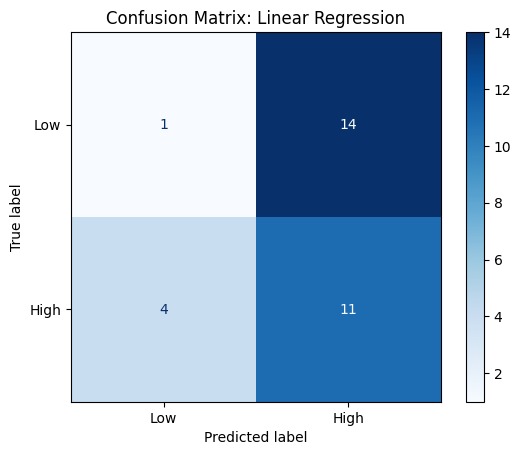

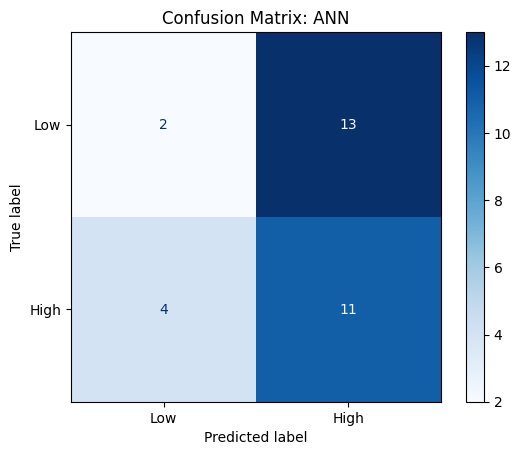

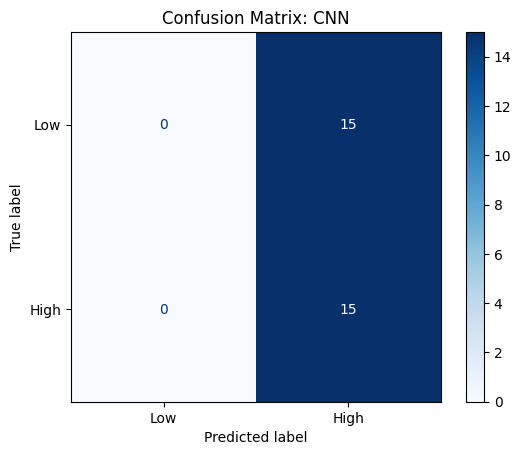

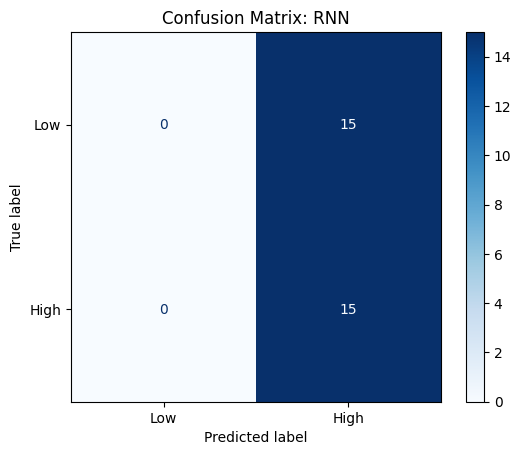

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define binary classification threshold
threshold = y_test.median()
y_true_class = (y_test >= threshold).astype(int)

# Dictionary of model predictions
model_preds = {
    "Linear Regression": y_lr_pred,
    "ANN": y_ann_pred,
    "CNN": y_cnn_pred,
    "RNN": y_rnn_pred,
    #"GAN": y_gan_pred,
}

# Plot confusion matrix for each model
for name, y_pred in model_preds.items():
    y_pred_class = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_true_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])

    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()


**Part** **8**: **Classification** **Metrices** **Comparison**

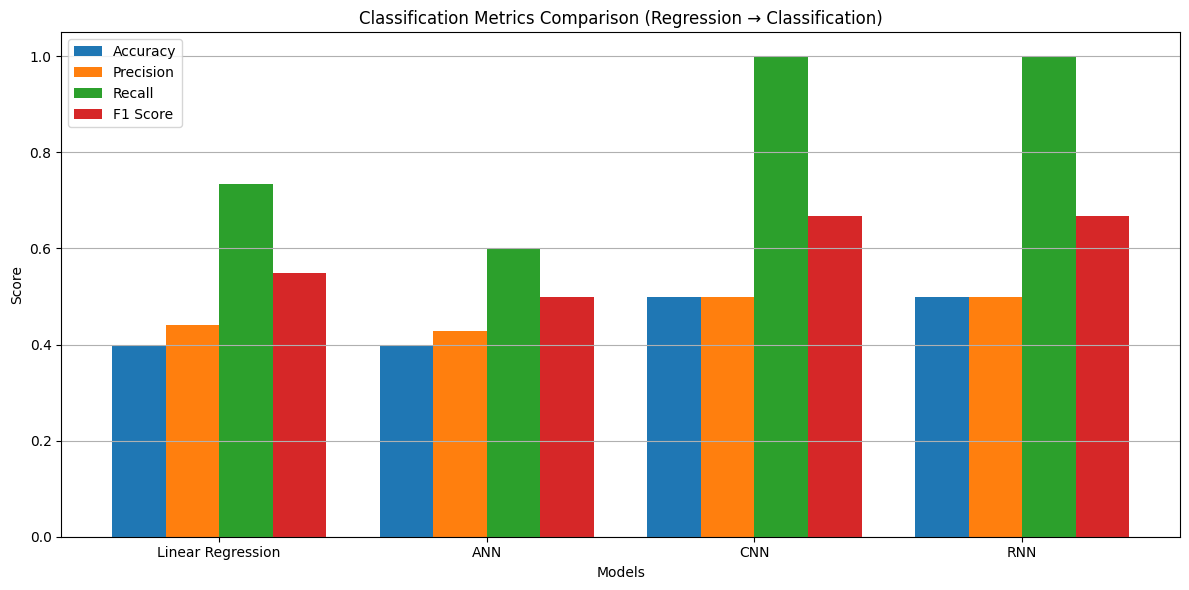

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
threshold = y_test.median()
y_true_class = (y_test >= threshold).astype(int)
model_preds = {
    "Linear Regression": y_lr_pred,
    "ANN": y_ann_pred,
    "CNN": y_cnn_pred,
    "RNN": y_rnn_pred
}

# Initialize metric containers
accuracy_vals = []
precision_vals = []
recall_vals = []
f1_vals = []
model_names = []

# Compute metrics for each model
for name, y_pred in model_preds.items():
    y_pred_class = (y_pred >= threshold).astype(int)
    accuracy_vals.append(accuracy_score(y_true_class, y_pred_class))
    precision_vals.append(precision_score(y_true_class, y_pred_class, zero_division=0))
    recall_vals.append(recall_score(y_true_class, y_pred_class, zero_division=0))
    f1_vals.append(f1_score(y_true_class, y_pred_class, zero_division=0))
    model_names.append(name)

# Bar plot configuration
x = np.arange(len(model_names))
bar_width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*bar_width, accuracy_vals, width=bar_width, label='Accuracy')
plt.bar(x - 0.5*bar_width, precision_vals, width=bar_width, label='Precision')
plt.bar(x + 0.5*bar_width, recall_vals, width=bar_width, label='Recall')
plt.bar(x + 1.5*bar_width, f1_vals, width=bar_width, label='F1 Score')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Classification Metrics Comparison (Regression → Classification)")
plt.xticks(x, model_names)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def get_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": root_mean_squared_error(y_true, y_pred)
    }

summary = {
    "Linear Regression": get_metrics(y_test, y_lr_pred),
    "ANN": get_metrics(y_test, y_ann_pred),
    "CNN": get_metrics(y_test, y_cnn_pred),
    "RNN": get_metrics(y_test, y_rnn_pred),
}

pd.DataFrame(summary).T


,MAE,MSE,RMSE
Linear Regression,24.230309,810.122943,28.462659
ANN,21.018217,602.643990,24.548808
CNN,19.312645,447.921630,21.164159
RNN,18.057878,400.410038,20.010248


**Part** **9**: **Feature** **Importance** **for** **Linear** **Regression**

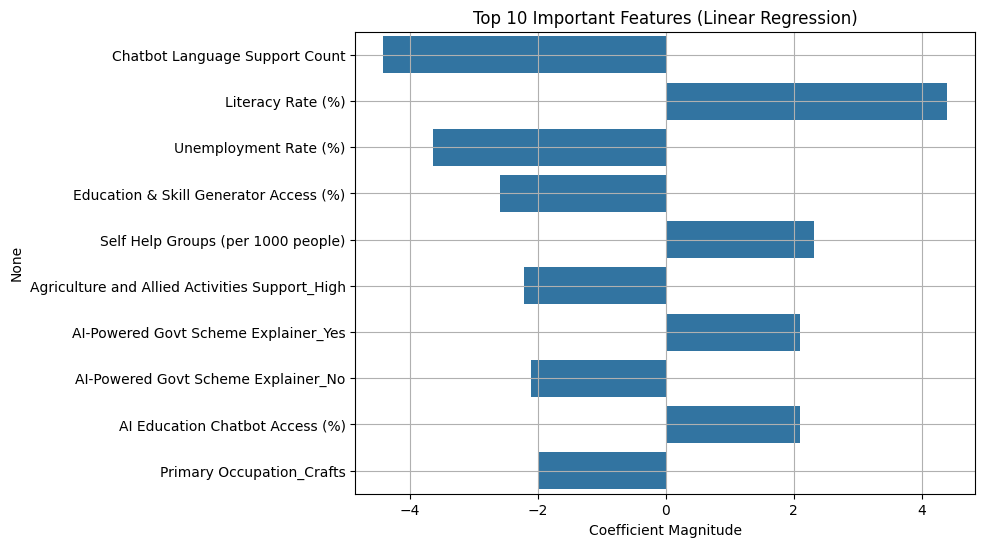

In [26]:
import seaborn as sns

coefficients = pd.Series(lr.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.values[:10], y=coefficients.index[:10])
plt.title("Top 10 Important Features (Linear Regression)")
plt.xlabel("Coefficient Magnitude")
plt.grid(True)
plt.show()


**Part** **10** :  **Recommend** **districts** **for** **AI** **tool** **deployment**

In [28]:
threshold = 30
low_score_df = df[df[target] < threshold][["District", target]].sort_values(by=target)

print(" Districts recommended for AI tool intervention:")
print(low_score_df)
low_score_df.to_csv("districts_for_ai_deployment.csv", index=False)


 Districts recommended for AI tool intervention:
       District  AI Tool Integration Score (0-100)
86         Dang                              20.82
39      Kodarma                              20.98
77      Solapur                              21.38
23    Balrampur                              21.48
66      Jalgaon                              21.69
15     Siliguri                              21.90
42       Chatra                              21.99
19      Chennai                              22.03
115         Mau                              22.34
98       Almora                              23.52
118  Pratapgarh                              23.86
0        Bastar                              24.93
124   Shravasti                              25.64
101   Chandauli                              26.21
40       Palamu                              26.41
136  Davanagere                              26.87
29      Latehar                              27.46
24    Lakhimpur                  

In [54]:
df=pd.read_csv('/content/districts_for_ai_deployment.csv')
df.head()

,District,AI Tool Integration Score (0-100)
0,Dang,20.82
1,Kodarma,20.98
2,Solapur,21.38
3,Balrampur,21.48
4,Jalgaon,21.69


**Part** **11**: **Create Empowerment Score + Predict AI + Recommend AI Tool Deployment**



In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_excel("/content/Rural_Empowerment_AI_Final_with_Visuals_Fixed (1).xlsx")

# Remove rows with missing target
target = "AI Tool Integration Score (0-100)"
df = df.dropna(subset=[target])

# Select features for Livelihood Empowerment Score
empowerment_features = [
    'Literacy Rate (%)',
    'Digital Literacy (%)',
    'Healthcare Access Index (0-100)',
    'Sustainability Index (0-100)',
    'Unemployment Rate (%)',
    'Access to Government Schemes (%)',
    'Self Help Groups (per 1000 people)',
    'Access to Clean Drinking Water (%)',
    'Healthcare and Well-being Coverage (%)'
]

# Normalize and create custom score
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[empowerment_features])
df["Livelihood Empowerment Score"] = scaled.mean(axis=1) * 100

# Predict AI Tool Integration Score using Random Forest
X = df[empowerment_features]
y = df[target]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
df["Predicted AI Tool Score"] = model.predict(X)

# Label as "AI Integrated" if predicted score >= 50
df["AI Integrated"] = df["Predicted AI Tool Score"].apply(lambda x: "Yes" if x >= 50 else "No")

# Recommend AI deployment: High empowerment but No AI
df["Recommendation"] = df.apply(
    lambda row: "Deploy AI Tools" if row["Livelihood Empowerment Score"] >= 50 and row["AI Integrated"] == "No" else "OK",
    axis=1
)

# Save final outputs
output_cols = [
    "District",
    "Livelihood Empowerment Score",
    "Predicted AI Tool Score",
    "AI Integrated",
    "Recommendation"
]
df_final = df[output_cols]
df_final.to_excel("Empowerment_AI_Recommendation_Final.xlsx", index=False)
print("File saved: Empowerment_AI_Recommendation_Final.xlsx")


File saved: Empowerment_AI_Recommendation_Final.xlsx


In [40]:
df=pd.read_excel('/content/Empowerment_AI_Recommendation_Final.xlsx')
df.head()

,District,Livelihood Empowerment Score,Predicted AI Tool Score,AI Integrated,Recommendation
0,Bastar,45.008970,32.7732,No,OK
1,Bijapur,58.911579,70.8716,Yes,OK
2,Khagaria,59.958364,59.1472,Yes,OK
3,Muzaffarpur,52.197680,57.8809,Yes,OK
4,Ranchi,44.376963,49.8746,No,OK


 **Part** **12**: **Visualizations – Empowerment vs AI Score + Recommendations**


<ipython-input-32-56337ff20ea1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Livelihood Empowerment Score", y="District", data=df_sorted.head(10), palette="viridis")


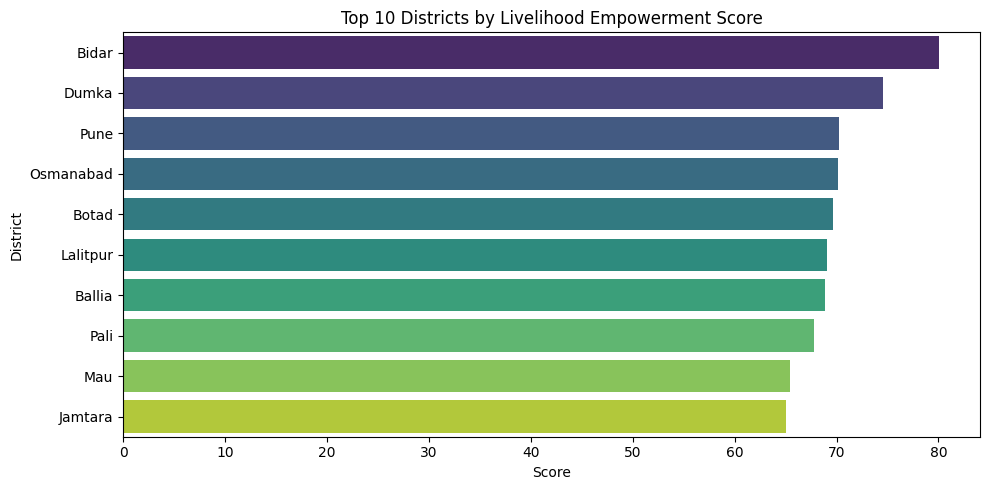

<ipython-input-32-56337ff20ea1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Livelihood Empowerment Score", y="District", data=df_sorted.tail(10), palette="magma")


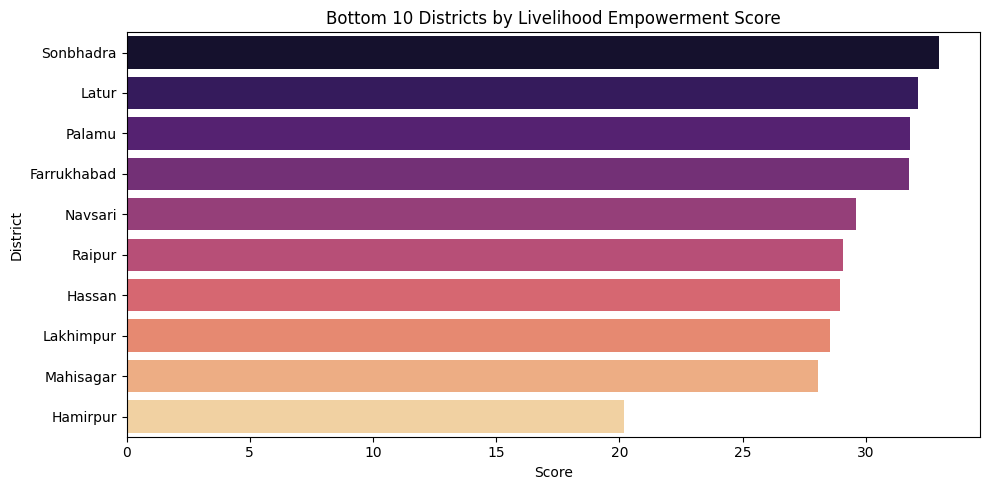

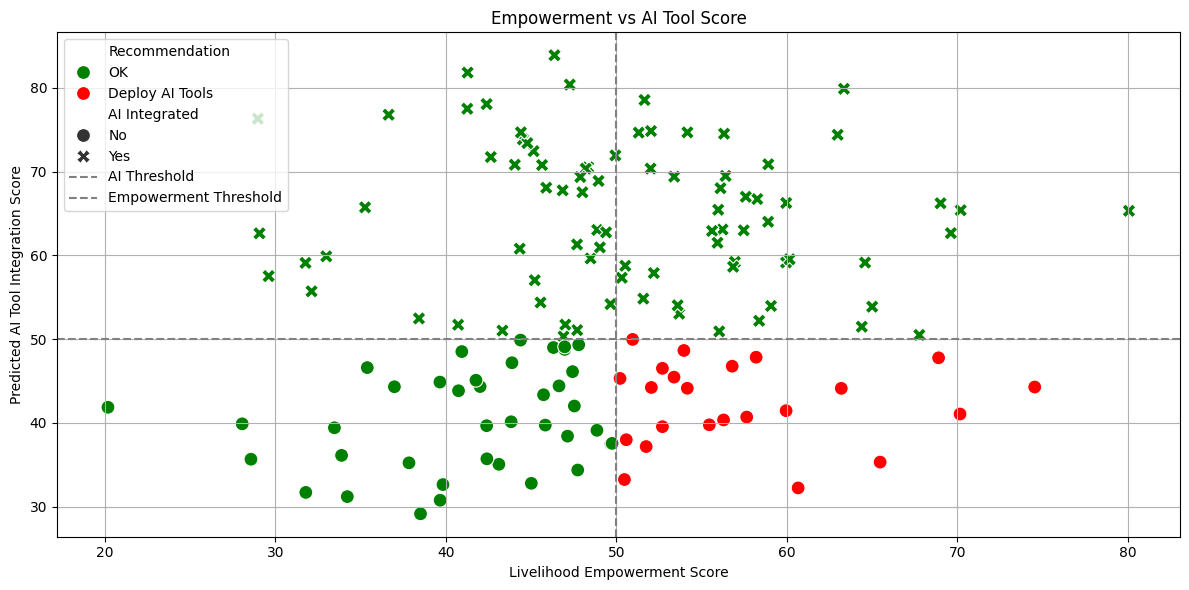

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by Livelihood Score
df_sorted = df_final.sort_values("Livelihood Empowerment Score", ascending=False)

# Bar plot: Top 10 Empowered Districts
plt.figure(figsize=(10, 5))
sns.barplot(x="Livelihood Empowerment Score", y="District", data=df_sorted.head(10), palette="viridis")
plt.title("Top 10 Districts by Livelihood Empowerment Score")
plt.xlabel("Score")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# Bar plot: Bottom 10 Empowered Districts
plt.figure(figsize=(10, 5))
sns.barplot(x="Livelihood Empowerment Score", y="District", data=df_sorted.tail(10), palette="magma")
plt.title("Bottom 10 Districts by Livelihood Empowerment Score")
plt.xlabel("Score")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# Compare Empowerment vs AI Tool Score for all districts
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_final,
    x="Livelihood Empowerment Score",
    y="Predicted AI Tool Score",
    hue="Recommendation",
    palette={"Deploy AI Tools": "red", "OK": "green"},
    style="AI Integrated",
    s=100
)
plt.title("Empowerment vs AI Tool Score")
plt.xlabel("Livelihood Empowerment Score")
plt.ylabel("Predicted AI Tool Integration Score")
plt.axhline(50, color='gray', linestyle='--', label="AI Threshold")
plt.axvline(50, color='gray', linestyle='--', label="Empowerment Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
